In [75]:
import torch
import torch.nn as nn
import time

# Make sure to use only 10% of the available MNIST data.
# Otherwise, experiment will take quite long (around 90 minutes).

# (Modified version of AlexNet)
class AlexNet(nn.Module):
    def __init__(self, num_class=10):
        super(AlexNet, self).__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 96, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.fc_layer1 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(6400, 800),
            nn.ReLU(inplace=True),
            nn.Linear(800, 10)
        )

    def forward(self, x):
        output = self.conv_layer1(x)
        output = self.conv_layer2(output)
        output = self.conv_layer3(output)
        output = torch.flatten(output, 1)
        output = self.fc_layer1(output)
        return output




In [76]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms
import random

# MNIST dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                  
                               download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                              train=False, 
                              transform=transforms.ToTensor())

dataset_size = len(train_dataset)

In [77]:
from torch.utils.data.sampler import SubsetRandomSampler
# Use 10% of Train_data to reduce the computation time of this exp.

train_dataset.targets = [random.randint(0,9) for idx in range(dataset_size)]

train_size = int(dataset_size * 0.1)
validation_size = int(dataset_size * 0.9)

train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])


#random_indices = random.sample(range(dataset_size), int(dataset_size * 0.1))
#sample = SubsetRandomSampler(random_indices)


# Make data_loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)




In [78]:
print(torch.cuda.is_available())

True


In [79]:
learning_rate = 0.1
batch_size = 64
epochs = 150

loss_list = []
acc_list = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

tick = time.time()


for epoch in range(epochs):
    train_loss, correct, total, cnt = 0, 0, 0, 0
    
    for images, labels in train_loader:
        
      model.train()
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      output = model(images)

      loss = loss_function(output, labels)
      loss.backward()

      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += labels.size(0)
      train_loss += loss.item()
      cnt += 1

      optimizer.step()

    accuracy = correct/total
    avg_loss = train_loss/cnt

    loss_list.append(avg_loss)
    acc_list.append(accuracy)
    print(f"Epoch {epoch + 1} : Train Loss {avg_loss:.2f}, Accuracy {accuracy:.2f}%")
    
tock = time.time()
print(f"Total training time: {tock - tick}")

Epoch 1 : Train Loss 2.30, Accuracy 0.10%
Epoch 2 : Train Loss 2.30, Accuracy 0.10%
Epoch 3 : Train Loss 2.30, Accuracy 0.10%
Epoch 4 : Train Loss 2.30, Accuracy 0.10%
Epoch 5 : Train Loss 2.30, Accuracy 0.10%
Epoch 6 : Train Loss 2.30, Accuracy 0.10%
Epoch 7 : Train Loss 2.30, Accuracy 0.10%
Epoch 8 : Train Loss 2.30, Accuracy 0.10%
Epoch 9 : Train Loss 2.30, Accuracy 0.10%
Epoch 10 : Train Loss 2.30, Accuracy 0.10%
Epoch 11 : Train Loss 2.30, Accuracy 0.10%
Epoch 12 : Train Loss 2.30, Accuracy 0.09%
Epoch 13 : Train Loss 2.30, Accuracy 0.10%
Epoch 14 : Train Loss 2.30, Accuracy 0.10%
Epoch 15 : Train Loss 2.30, Accuracy 0.10%
Epoch 16 : Train Loss 2.30, Accuracy 0.10%
Epoch 17 : Train Loss 2.30, Accuracy 0.10%
Epoch 18 : Train Loss 2.30, Accuracy 0.10%
Epoch 19 : Train Loss 2.30, Accuracy 0.10%
Epoch 20 : Train Loss 2.30, Accuracy 0.10%
Epoch 21 : Train Loss 2.30, Accuracy 0.10%
Epoch 22 : Train Loss 2.30, Accuracy 0.10%
Epoch 23 : Train Loss 2.30, Accuracy 0.10%
Epoch 24 : Train Los

[]

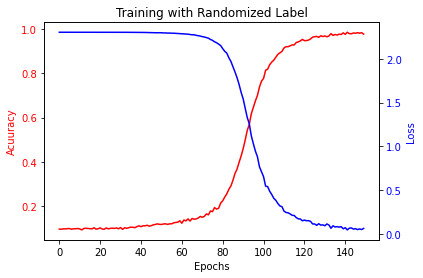

In [80]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax1 = plt.subplots()
plt.title('Training with Randomized Label')
plt.xlabel('Epochs')
ax1.plot(np.arange(epochs), acc_list, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')
plt.ylabel('Acuuracy', color='red')

ax2 = ax1.twinx()
ax2.plot(np.arange(epochs), loss_list, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.ylabel('Loss', color='blue')
plt.plot()